<a href="https://colab.research.google.com/github/Grecia329/EcuacionesDiferencialesParciales-/blob/main/SERIE_GENERALIZADA_DE_FOURIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <span style="color:orange;"> *Ejercicio:*</span>
* Verifcar que el siguiente es un problema de Sturm-Lioouville

 $\quad f''(x)+2f'(x)+𝛌(x)=0 \quad 0<x<1$
con
$\quad f(0)=0 \quad$
$\quad f(1)=0$

* Usar las eigenfunciones de este problema para expandir en series de Fourier generalizdas la función:

$u(x)= e^{-x}, \quad 0\le x\le 1$


##<span style="color:pink;">Parte a) verifcar que el siguiente es un problema de Sturm-Lioouville</span>

$f''+2f'+𝛌f=0$


**Ecuación diferencial:**
$
f''(x) + 2f'(x) + \lambda f(x) = 0, \quad 0 < x < 1
$

**Condiciones de frontera:**
$
f(0) = 0, \quad f(1) = 0
$

**Forma de Sturm-Liouville:**
$
\frac{d}{dx}\left[e^{2x}f'(x)\right] + \lambda e^{2x}f(x) = 0
$

**Solución general:**
$
f(x) = e^{-x}\left[A\cos(\sqrt{\lambda-1}x) + B\sin(\sqrt{\lambda-1}x)\right]
$

**Autovalores:**
$
\lambda_n = n^2\pi^2 + 1, \quad n=1,2,3,\ldots
$

**Autofunciones:**
$
f_n(x) = e^{-x}\sin(n\pi x), \quad n=1,2,3,\ldots
$

##<span style="color:pink;">Parte b)  Usar las eigenfunciones de este problema para expandir en series de Fourier generalizdas la función:</span>

**Función a expandir:**
$
u(x) = e^{-x}, \quad 0 \leq x \leq 1
$

**Expansión en autofunciones:**
$
e^{-x} = \sum_{n=1}^{\infty} c_n e^{-x}\sin(n\pi x)
$

**Coeficientes de Fourier:**
$
c_n = \frac{2[1 - (-1)^n]}{n\pi}
$


In [47]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Variable simbólica
x = sp.Symbol('x')

In [49]:
# Generamos zeta_n = n * pi, hasta n = 20
n_vals = list(range(1, 19))
zeta_vals = [n * sp.pi for n in n_vals]

In [50]:
# Función u(x) a aproximar
u = sp.exp(-x)


In [51]:
# Coeficientes C_n
C_n_vals = []

In [52]:
for n, zeta_n in zip(n_vals, zeta_vals):
    if n % 2 == 0:
        C_n = 0
    else:
        C_n = 4 / (n * sp.pi)
    C_n_vals.append(C_n)

In [53]:
# Serie aproximada
u_aprox = sum(C * sp.exp(-x) * sp.sin(zeta * x) for C, zeta in zip(C_n_vals, zeta_vals))

In [54]:
# Mostrar la serie en forma simbólica
print("Serie aproximada u_aprox(x):")
sp.pprint(sp.simplify(u_aprox))


Serie aproximada u_aprox(x):
                                                                               ↪
4⋅(765765⋅sin(π⋅x) + 255255⋅sin(3⋅π⋅x) + 153153⋅sin(5⋅π⋅x) + 109395⋅sin(7⋅π⋅x) ↪
────────────────────────────────────────────────────────────────────────────── ↪
                                                                               ↪

↪                                                                              ↪
↪  + 85085⋅sin(9⋅π⋅x) + 69615⋅sin(11⋅π⋅x) + 58905⋅sin(13⋅π⋅x) + 51051⋅sin(15⋅π ↪
↪ ──────────────────────────────────────────────────────────────────────────── ↪
↪          765765⋅π                                                            ↪

↪                           -x
↪ ⋅x) + 45045⋅sin(17⋅π⋅x))⋅ℯ  
↪ ────────────────────────────
↪                             


In [42]:
# Convertimos a funciones numéricas para graficar
u_func = sp.lambdify(x, u, "numpy")
u_aprox_func = sp.lambdify(x, u_aprox, "numpy")


In [43]:
# Evaluamos en puntos
x_vals = np.linspace(0, 1, 300)
y_real = u_func(x_vals)
y_aprox = u_aprox_func(x_vals)

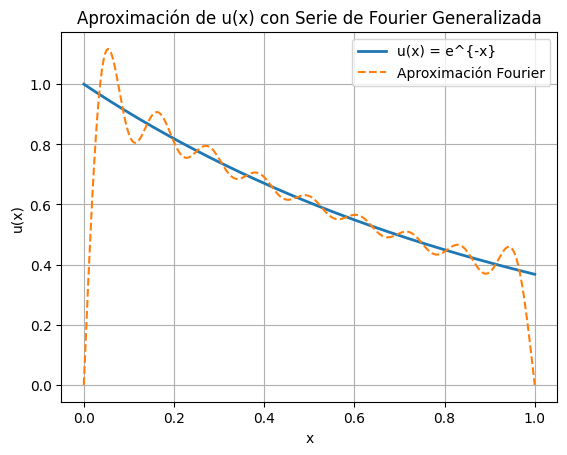

In [44]:
# Graficamos
plt.plot(x_vals, y_real, label="u(x) = e^{-x}", linewidth=2)
plt.plot(x_vals, y_aprox, label="Aproximación Fourier", linestyle='--')
plt.title("Aproximación de u(x) con Serie de Fourier Generalizada")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()

In [45]:
# Mostrar tabla de zeta y C_n
for n, z, c in zip(n_vals, zeta_vals, C_n_vals):
    print(f"n = {n}, zeta_n = {sp.N(z, 19)}, C_n = {sp.N(c, 19)}")

n = 1, zeta_n = 3.141592653589793238, C_n = 1.273239544735162686
n = 2, zeta_n = 6.283185307179586477, C_n = 0
n = 3, zeta_n = 9.424777960769379715, C_n = 0.4244131815783875621
n = 4, zeta_n = 12.56637061435917295, C_n = 0
n = 5, zeta_n = 15.70796326794896619, C_n = 0.2546479089470325372
n = 6, zeta_n = 18.84955592153875943, C_n = 0
n = 7, zeta_n = 21.99114857512855267, C_n = 0.1818913635335946695
n = 8, zeta_n = 25.13274122871834591, C_n = 0
n = 9, zeta_n = 28.27433388230813915, C_n = 0.1414710605261291874
n = 10, zeta_n = 31.41592653589793238, C_n = 0
n = 11, zeta_n = 34.55751918948772562, C_n = 0.1157490495213784260
n = 12, zeta_n = 37.69911184307751886, C_n = 0
n = 13, zeta_n = 40.84070449666731210, C_n = 0.09794150344116636047
n = 14, zeta_n = 43.98229715025710534, C_n = 0
n = 15, zeta_n = 47.12388980384689858, C_n = 0.08488263631567751241
n = 16, zeta_n = 50.26548245743669182, C_n = 0
n = 17, zeta_n = 53.40707511102648505, C_n = 0.07489644380795074624
n = 18, zeta_n = 56.54866776